In [28]:
# Dependencies for csv, datafram, plotting and statistics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import hvplot.pandas
import requests
import time
from scipy import stats

## Cement CO2 emissions of 11 countries, 2010-2018

In [29]:
# Read CSV which was obtained through Our World in Data https://ourworldindata.org/greenhouse-gas-emissions
# then from https://github.com/owid/co2-data
file_path = "Resources/owid-co2-data.csv"
co2_df = pd.read_csv(file_path)

co2_df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [30]:
# Reduce to desired columns
co2_df = co2_df[["country","year","cement_co2","cement_co2_per_capita"]]
co2_df

,country,year,cement_co2,cement_co2_per_capita
0,Afghanistan,1850,NaN,NaN
1,Afghanistan,1851,NaN,NaN
2,Afghanistan,1852,NaN,NaN
3,Afghanistan,1853,NaN,NaN
4,Afghanistan,1854,NaN,NaN
...,...,...,...,...
46518,Zimbabwe,2017,0.469,0.032
46519,Zimbabwe,2018,0.558,0.037
46520,Zimbabwe,2019,0.570,0.037
46521,Zimbabwe,2020,0.570,0.036


In [31]:
# rename column "country" to "Country name", "year" to "Year" for later merge with another data frame, use .rename
co2_df = co2_df.rename(columns={"country": "Country name", "year": "Year"})
co2_df

,Country name,Year,cement_co2,cement_co2_per_capita
0,Afghanistan,1850,NaN,NaN
1,Afghanistan,1851,NaN,NaN
2,Afghanistan,1852,NaN,NaN
3,Afghanistan,1853,NaN,NaN
4,Afghanistan,1854,NaN,NaN
...,...,...,...,...
46518,Zimbabwe,2017,0.469,0.032
46519,Zimbabwe,2018,0.558,0.037
46520,Zimbabwe,2019,0.570,0.037
46521,Zimbabwe,2020,0.570,0.036


In [32]:
# Restrict to 11 countries: Australia, Brazil, China, Germany, India, Israel, Japan, Russia, South Africa, United Kingdom, United States
# Years: 2010-2018
# Using .loc and .isin
countries = [
    "Australia",
    "Brazil",
    "China",
    "Germany",
    "India",
    "Israel",
    "Japan",
    "Russia",
    "South Africa",
    "United Kingdom",
    "United States"
]

co2_df = co2_df.loc[(co2_df["Country name"].isin(countries)) &
                    (co2_df["Year"] > 2009) &
                    (co2_df["Year"] < 2019)]
co2_df

,Country name,Year,cement_co2,cement_co2_per_capita
3533,Australia,2010,3.549,0.161
3534,Australia,2011,3.496,0.156
3535,Australia,2012,3.518,0.155
3536,Australia,2013,3.294,0.143
3537,Australia,2014,3.138,0.134
...,...,...,...,...
44215,United States,2014,39.439,0.122
44216,United States,2015,39.907,0.123
44217,United States,2016,39.439,0.121
44218,United States,2017,40.324,0.122


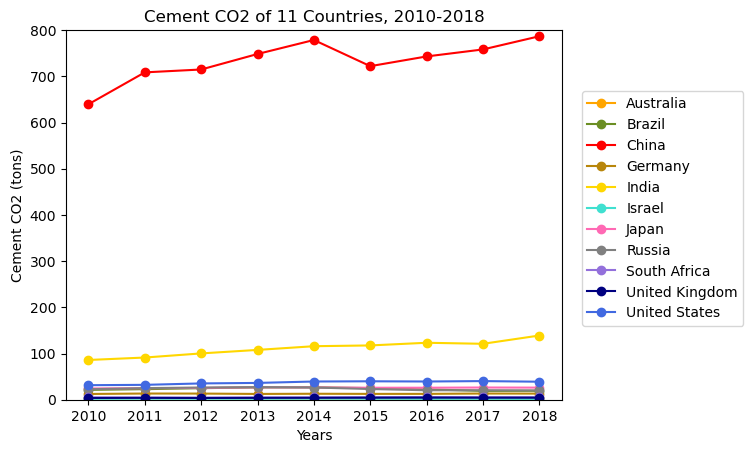

In [33]:
# define colors
country_colors = {
    "Australia":"orange",
    "Brazil":"olivedrab",
    "China":"red",
    "Germany":"darkgoldenrod",
    "India":"gold",
    "Israel":"turquoise",
    "Japan":"hotpink",
    "Russia":"grey",
    "South Africa":"mediumpurple",
    "United Kingdom":"navy",
    "United States":"royalblue"
};
# graph: x-axis: years 2010-2018, y-axis: cement_co2, separate color line for each country

for country in countries:
    country_df = co2_df[co2_df["Country name"] == country]
    plt.plot(country_df["Year"], country_df["cement_co2"], '-o', label=country, color=country_colors[country])
    plt.ylim(0,800)
    # y scale


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Cement CO2 of 11 Countries, 2010-2018")
plt.xlabel("Years")
plt.ylabel("Cement CO2 (tons)")

# Print our chart to the screen
plt.show()

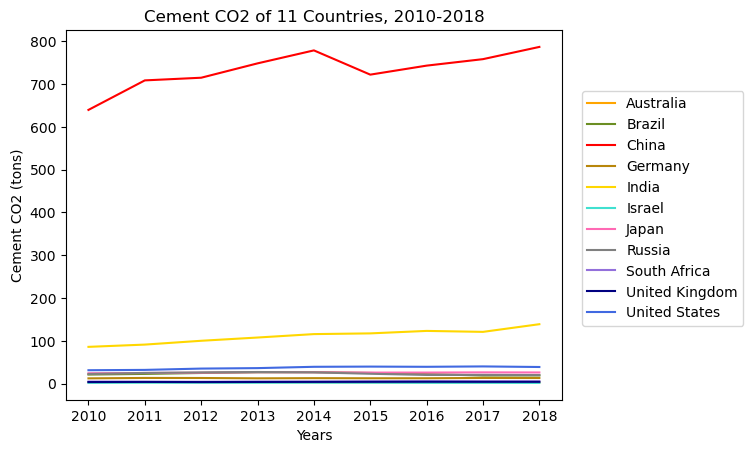

In [34]:
# define colors
country_colors = {
    "Australia":"orange",
    "Brazil":"olivedrab",
    "China":"red",
    "Germany":"darkgoldenrod",
    "India":"gold",
    "Israel":"turquoise",
    "Japan":"hotpink",
    "Russia":"grey",
    "South Africa":"mediumpurple",
    "United Kingdom":"navy",
    "United States":"royalblue"
};
# graph: x-axis: years 2010-2018, y-axis: cement_co2, separate color line for each country

for country in countries:
    country_df = co2_df[co2_df["Country name"] == country]
    plt.plot(country_df["Year"], country_df["cement_co2"], label=country, color=country_colors[country])


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Cement CO2 of 11 Countries, 2010-2018")
plt.xlabel("Years")
plt.ylabel("Cement CO2 (tons)")

# Print our chart to the screen
plt.show()

## Cement CO2 per capita of 11 countries, 2010-2018

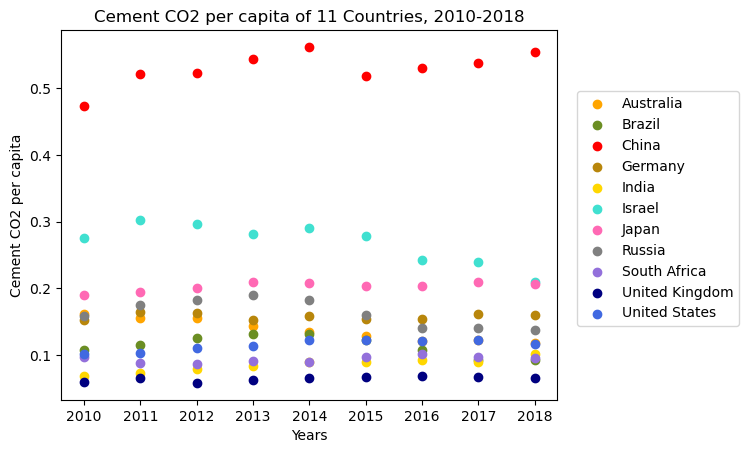

In [35]:
# define colors
country_colors = {
    "Australia":"orange",
    "Brazil":"olivedrab",
    "China":"red",
    "Germany":"darkgoldenrod",
    "India":"gold",
    "Israel":"turquoise",
    "Japan":"hotpink",
    "Russia":"grey",
    "South Africa":"mediumpurple",
    "United Kingdom":"navy",
    "United States":"royalblue"
};
# graph: x-axis: years 2010-2018, y-axis: cement_co2, separate color line for each country

for country in countries:
    country_df = co2_df[co2_df["Country name"] == country]
    plt.scatter(country_df["Year"], country_df["cement_co2_per_capita"], label=country, color=country_colors[country])


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Cement CO2 per capita of 11 Countries, 2010-2018")
plt.xlabel("Years")
plt.ylabel("Cement CO2 per capita")

# Print our chart to the screen
plt.show()

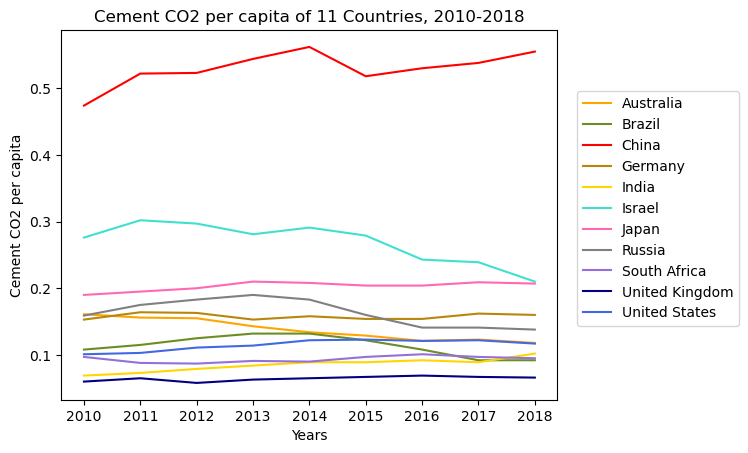

In [36]:
# define colors
country_colors = {
    "Australia":"orange",
    "Brazil":"olivedrab",
    "China":"red",
    "Germany":"darkgoldenrod",
    "India":"gold",
    "Israel":"turquoise",
    "Japan":"hotpink",
    "Russia":"grey",
    "South Africa":"mediumpurple",
    "United Kingdom":"navy",
    "United States":"royalblue"
};
# graph: x-axis: years 2010-2018, y-axis: cement_co2, separate color line for each country

for country in countries:
    country_df = co2_df[co2_df["Country name"] == country]
    plt.plot(country_df["Year"], country_df["cement_co2_per_capita"], label=country, color=country_colors[country])


# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc=(1.04, 0.2))

# Labels
plt.title("Cement CO2 per capita of 11 Countries, 2010-2018")
plt.xlabel("Years")
plt.ylabel("Cement CO2 per capita")

# Saves an image of our chart so that we can view it in a folder, make room for the legend
plt.savefig("Images/cementco2pc.png", bbox_inches='tight')

# Print our chart to the screen
plt.show()